## Import Package

In [1]:
# Python import library
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
# Self_define import file
import process_data as pcs


## Process Data

In [2]:
# Call self-defined function to get data we want
processor = pcs.Processor()
# lfhf/ sdnn in diff dimensions
lfhf_list = processor.getLfhf()
sdnn_list = processor.getSdnn()
sd_fq_array = processor.get_sdnn_lfhf_array_norm()
dict_3d = processor.get3d()
# ThreadMill data
threadmill_data = processor.getThreadMData()
# Interval
intervals = processor.getInterval()


/Users/tongyun/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


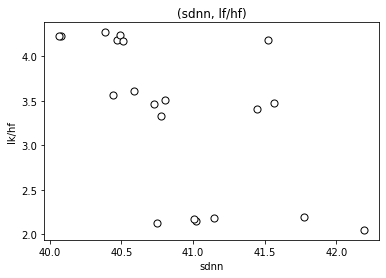

In [3]:
fig1 = plt.figure(1)
ax1 = fig1.gca()
plt.title('(sdnn, lf/hf)')
plt.xlabel('sdnn')
plt.ylabel('lk/hf')
# X-axis is sdnn value, Y-axis is lfhf value
plt.scatter(sdnn_list,lfhf_list, c='white', marker='o',
   edgecolor='black', s=50 )
fig1.show()

## KMean Clustering and Visualization

In [4]:
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(sd_fq_array)

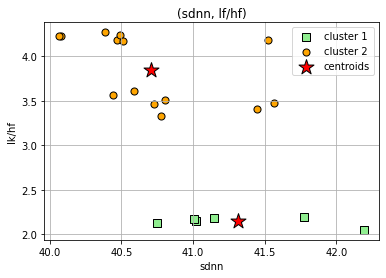

In [5]:
# plot the 2 clusters
plt.scatter(
    sd_fq_array[y_km == 0, 0], sd_fq_array[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    sd_fq_array[y_km == 1, 0], sd_fq_array[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)


# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.title('(sdnn, lf/hf)')
plt.xlabel('sdnn')
plt.ylabel('lk/hf')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

## 3D Data Recollection and Plot

In [11]:
# First cluster data
cluster1_z = []
length1 = len(sd_fq_array[y_km == 0, 0]) 
Y1 = np.zeros(shape=(length1,3))
for i in range( length1 ):
    idx = dict_3d[( sd_fq_array[y_km == 0, 0][i], sd_fq_array[y_km == 0, 1][i])]
    Y1[i] = [sd_fq_array[y_km == 0, 0][i], sd_fq_array[y_km == 0, 1][i] ,idx]
    cluster1_z.append(idx)

# Second cluster data
cluster2_z = []
length2 = len(sd_fq_array[y_km == 1, 0]) 
Y2 = np.zeros(shape=(length2,3))
for i in range( length2 ):
    idx = dict_3d[( sd_fq_array[y_km == 1, 0][i], sd_fq_array[y_km == 1, 1][i])]
    Y2[i] = [sd_fq_array[y_km == 1, 0][i], sd_fq_array[y_km == 1, 1][i],idx ]
    cluster2_z.append(idx)
    


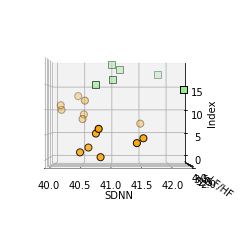

In [12]:
ax = plt.axes(projection='3d')

# Set axis label
ax.set_xlabel('SDNN')
ax.set_ylabel('LF/HF')
ax.set_zlabel('Index')

# Data for three-dimensional scattered points
ax.scatter3D(Y1[:, 0], Y1[:, 1], Y1[:, 2], s=50, 
    marker='s', edgecolor='black',c='lightgreen',
    label='cluster 1')

ax.scatter3D(Y2[:, 0], Y2[:, 1], Y2[:, 2], s=50, 
    marker='o', edgecolor='black',c='orange',
    label='cluster 2')

# Modify following function to rotate
ax.view_init(0, 270)




## Find corresponding threadmill data

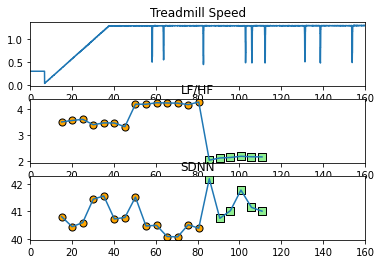

In [15]:
i = 0 #67410
f = 134820
ii= 17500
ff= 32500

num_figures = 3
plt.figure()
plt.subplot(num_figures,1,1)
plt.title('Treadmill Speed')
treadmill_data = processor.getThreadMData()
plt.plot(treadmill_data.Time, treadmill_data.Speed)
plt.xlim(0,160)
  
plt.subplot(num_figures,1,2)
plt.title('LF/HF')
scale = [15+i[0]/1910 for i in intervals[0:-1]]
#plt.plot(lf_hf_store,'*')
plt.plot(scale, lfhf_list)

# First cluster in lfhf
scale1 = [scale[i] for i in cluster1_z]
lfhf1 = [lfhf_list[i] for i in cluster1_z]
plt.scatter(
    scale1, lfhf1,
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

# Second cluster in lfhf
scale2 = [scale[i] for i in cluster2_z]
lfhf2 = [lfhf_list[i] for i in cluster2_z]
plt.scatter(
    scale2, lfhf2,
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)
plt.xlim(0,160)

plt.subplot(num_figures,1,3)
plt.title('SDNN')
plt.plot(scale, sdnn_list)
# First cluster in sdnn
scale1 = [scale[i] for i in cluster1_z]
sdnn1 = [sdnn_list[i] for i in cluster1_z]
plt.scatter(
    scale1, sdnn1,
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

# Second cluster in sdnn
scale2 = [scale[i] for i in cluster2_z]
sdnn2 = [sdnn_list[i] for i in cluster2_z]
plt.scatter(
    scale2, sdnn2,
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)
plt.xlim(0,160)
plt.show()